In [452]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import timeit
# Import sklearn and required packages
import sklearn
from sklearn import tree
from sklearn import ensemble 
from sklearn import neighbors
from sklearn import linear_model
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [453]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/customers_data.csv')

There are 20000 members of the loyalty program and 100000 non-members in this dataset


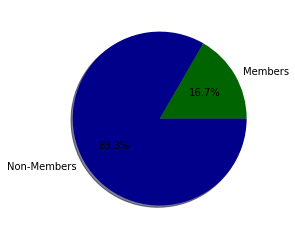

In [454]:
# Determine number of observations in each category
loyal = len(df[df['loyalty']==True])
not_loyal = len(df[df['loyalty']==False])
print('There are {} members of the loyalty program and {} non-members in this dataset'.format(loyal,not_loyal))
sizes = (loyal,not_loyal)
plt.pie(sizes,labels=('Members','Non-Members'),colors=('darkgreen','darkblue'),autopct='%1.1f%%',shadow=True)
plt.show()

In [ ]:
# This shows that there members are a fairly small fraction of the overall dataset

In [455]:
df.head(n=5)

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,0,19.58,male,no,31.0,35.0,False
1,1,65.16,male,yes,23.0,61.0,False
2,2,40.60,female,no,36.0,49.0,False
3,3,38.01,male,yes,47.0,57.0,False
4,4,22.32,female,yes,5.0,39.0,False


In [456]:
df.describe()

,Unnamed: 0,purch_amt,age,days_since_last_purch
count,120000.000000,120000.000000,120000.000000,120000.000000
mean,59999.500000,44.036234,25.803008,56.605908
std,34641.160489,20.473148,10.153072,16.422187
min,0.000000,-43.950000,-22.000000,-9.000000
25%,29999.750000,30.210000,19.000000,45.000000
50%,59999.500000,43.970000,26.000000,57.000000
75%,89999.250000,57.830000,33.000000,68.000000
max,119999.000000,142.200000,71.000000,125.000000


In [457]:
# Make binary indicators for variables below
gender = pd.get_dummies(df['gender'])
card = pd.get_dummies(df['card_on_file'])
# Collect binary indicators back into original dataframe
df['Male'] = gender['male']
df['Female'] = gender['female']
df['Card_on_file'] = card['yes']
df['No_Card'] = card['no']

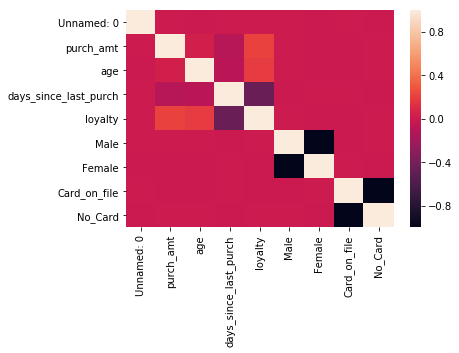

In [458]:
sns.heatmap(df.corr())

In [459]:
# Collect all features needed for modeling
features = df[['purch_amt','Male','Female','Card_on_file','days_since_last_purch','age','No_Card','loyalty']]

In [460]:
# Seperate into x and y variables
X = features.drop(labels='loyalty',axis=1)
Y = features['loyalty']

# Split into test and training set
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [461]:
# Define function to test models

# Create variables to store results in
test_acc =  []
cv_acc = []
cv_sd = []
runtime = []
true = []

def test_model(regression):
    # Fit Regression
    start = timeit.default_timer()
    regression.fit(x_train,y_train)
    stop = timeit.default_timer()
    time = stop-start
    runtime.append(time)
    # Collect predictions and actual results in df 
    results = pd.DataFrame(regression.predict(x_test))
    results.columns=['predicted']
    results['actual'] = list(y_test)
    correct = results[results['predicted']==results['actual']]
    corr_t = correct[correct['actual']==True]
    # Calculate accuracy and print
    acc = len(correct) / len(results)
    accuracy = round(acc*100,3)
    print('Total Test Set Accuracy {}%'.format(accuracy))
    print('{}% of True Observations Correctly Predicted'.format(round((len(corr_t)/loyal)*100),3))
    true.append(round((len(corr_t)/loyal)*100,3))
    test_acc.append(accuracy)
    # Do five fold cross validation on model
    cv = cross_val_score(regression,X,Y,cv=5)
    print('''Five Fold Cross Validation Results''')
    print(cv)
    cv_acc.append(round(cv.mean()*100,2))
    cv_sd.append(cv.std())
    # Return confusion matrix
    return pd.crosstab(results['actual'],results['predicted'])

In [462]:
# NAIVE BAYES MODEL
bnb = BernoulliNB()
test_model(bnb)

Total Test Set Accuracy 83.525%
0% of True Observations Correctly Predicted
Five Fold Cross Validation Results
[0.83358333 0.83333333 0.83329167 0.833375   0.833375  ]


predicted,False,True
actual,,
False,20043,2
True,3952,3


In [463]:
# LOGISTIC REGRESSION
log = linear_model.LogisticRegression(solver='lbfgs')
test_model(log)

Total Test Set Accuracy 86.804%
8% of True Observations Correctly Predicted
Five Fold Cross Validation Results
[0.86825    0.86745833 0.86720833 0.87033333 0.87095833]


predicted,False,True
actual,,
False,19199,846
True,2321,1634


In [464]:
# KNN CLASSIFIER
knn_c = neighbors.KNeighborsClassifier(n_neighbors=2)
test_model(knn_c)

Total Test Set Accuracy 84.283%
5% of True Observations Correctly Predicted
Five Fold Cross Validation Results
[0.8455     0.84358333 0.8425     0.84475    0.84533333]


predicted,False,True
actual,,
False,19254,791
True,2981,974


In [465]:
# DECISION TREE CLASSIFIER 
dt = tree.DecisionTreeClassifier(criterion='entropy',
                                max_depth=5)
test_model(dt)

Total Test Set Accuracy 86.117%
7% of True Observations Correctly Predicted
Five Fold Cross Validation Results
[0.85933333 0.86016667 0.85954167 0.86245833 0.86420833]


predicted,False,True
actual,,
False,19330,715
True,2617,1338


In [466]:
# RANDOM FOREST CLASSIFIER 
rfc = ensemble.RandomForestClassifier(n_estimators=4)
test_model(rfc)

Total Test Set Accuracy 84.192%
6% of True Observations Correctly Predicted
Five Fold Cross Validation Results
[0.84241667 0.84208333 0.84229167 0.8465     0.84191667]


predicted,False,True
actual,,
False,18915,1130
True,2664,1291


In [467]:
# Collect results into table and print
models = ['Naive Bayes','Logistic Regression', 'KNN Classifier',
          'Decision Tree Classifier','Random Forest Classifier']
results = pd.DataFrame(index=models)
results['Test Set Accuracy (%)'] = test_acc
results['Avg 5 Fold Cross Validation Accuracy (%)'] = cv_acc
results['SD Cross Validation Results'] = cv_sd
results['Runtime'] = runtime
results['Correctly Predicted True (%)'] = true
results

,Test Set Accuracy (%),Avg 5 Fold Cross Validation Accuracy (%),SD Cross Validation Results,Runtime,Correctly Predicted True (%)
Naive Bayes,83.525,83.34,0.000101,0.046257,0.015
Logistic Regression,86.804,86.88,0.001526,0.752356,8.170
KNN Classifier,84.283,84.43,0.001137,0.265596,4.870
Decision Tree Classifier,86.117,86.11,0.001893,0.284819,6.690
Random Forest Classifier,84.192,84.30,0.001738,0.703784,6.455


In [468]:
# Model performance is pretty bad and test set and 5 fold accuracies not really
# Representative of model performance due to imbalance of dataset
# Next I will see if a PCA can improve the results of these models

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Text(0, 0.5, 'Eigenvalues')

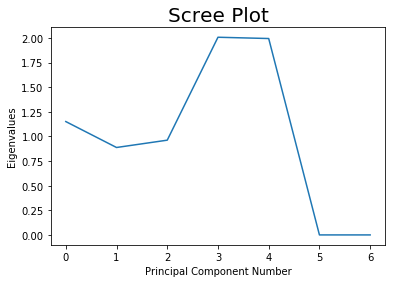

In [469]:
# Generate data for scree plot
scree_data = StandardScaler().fit_transform(X)
Xt = scree_data.T
Cx = np.cov(Xt)
eig_val_cov,eig_vec_cov = np.linalg.eig(Cx)

# Display Scree Plot
plt.plot(eig_val_cov)
plt.title("Scree Plot",size=(20))
plt.xlabel("Principal Component Number")
plt.ylabel("Eigenvalues")

In [470]:
# Do PCA to compress data into 5 features
sklearn_pca = PCA(n_components=5)
x_pca = sklearn_pca.fit_transform(X)

In [471]:
# Seperate into x and y variables
X = x_pca
Y = features['loyalty']

# Split into test and training set
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

# Create variables to store results in
test_acc =  []
cv_acc = []
cv_sd = []
runtime = []
true = []

def test_model(regression):
    # Fit Regression
    start = timeit.default_timer()
    regression.fit(x_train,y_train)
    stop = timeit.default_timer()
    time = stop-start
    runtime.append(time)
    # Collect predictions and actual results in df 
    results = pd.DataFrame(regression.predict(x_test))
    results.columns=['predicted']
    results['actual'] = list(y_test)
    correct = results[results['predicted']==results['actual']]
    corr_t = correct[correct['actual']==True]
    # Calculate accuracy and print
    acc = len(correct) / len(results)
    accuracy = round(acc*100,3)
    print('Total Test Set Accuracy {}%'.format(accuracy))
    print('{}% of True Observations Correctly Predicted'.format(round((len(corr_t)/loyal)*100),3))
    true.append(round((len(corr_t)/loyal)*100,3))
    test_acc.append(accuracy)
    # Do five fold cross validation on model
    cv = cross_val_score(regression,X,Y,cv=5)
    print('''Five Fold Cross Validation Results''')
    print(cv)
    cv_acc.append(round(cv.mean()*100,2))
    cv_sd.append(cv.std())
    # Return confusion matrix
    return pd.crosstab(results['actual'],results['predicted'])

In [472]:
# NAIVE BAYES
bnb = BernoulliNB()
test_model(bnb)

Total Test Set Accuracy 83.708%
5% of True Observations Correctly Predicted
Five Fold Cross Validation Results
[0.83833333 0.83545833 0.83395833 0.83658333 0.83416667]


predicted,False,True
actual,,
False,19033,1100
True,2810,1057


In [473]:
# LOGISTIC REGRESSION
log = linear_model.LogisticRegression(solver='lbfgs')
test_model(log)

Total Test Set Accuracy 87.221%
8% of True Observations Correctly Predicted
Five Fold Cross Validation Results
[0.86825    0.86745833 0.86720833 0.870375   0.87095833]


predicted,False,True
actual,,
False,19323,810
True,2257,1610


In [474]:
# KNN CLASSIFIER
knn_c = neighbors.KNeighborsClassifier(n_neighbors=2)
test_model(knn_c)

Total Test Set Accuracy 84.796%
5% of True Observations Correctly Predicted
Five Fold Cross Validation Results
[0.84558333 0.843625   0.84245833 0.84479167 0.84516667]


predicted,False,True
actual,,
False,19401,732
True,2917,950


In [475]:
# DECISION TREE CLASSIFIER 
dt = tree.DecisionTreeClassifier(criterion='entropy',
                                max_depth=5)
test_model(dt)

Total Test Set Accuracy 86.725%
7% of True Observations Correctly Predicted
Five Fold Cross Validation Results
[0.861125   0.85858333 0.86075    0.86270833 0.86333333]


predicted,False,True
actual,,
False,19412,721
True,2465,1402


In [476]:
# RANDOM FOREST CLASSIFIER 
rfc = ensemble.RandomForestClassifier(n_estimators=4)
test_model(rfc)

Total Test Set Accuracy 84.721%
6% of True Observations Correctly Predicted
Five Fold Cross Validation Results
[0.846      0.842      0.84541667 0.84716667 0.844125  ]


predicted,False,True
actual,,
False,19064,1069
True,2598,1269


In [477]:
# Collect results into table and print
models = ['Naive Bayes','Logistic Regression', 'KNN Classifier',
          'Decision Tree Classifier','Random Forest Classifier']
pca_results = pd.DataFrame(index=models)
pca_results['Test Set Accuracy (%)'] = test_acc
pca_results['Avg 5 Fold Cross Validation Accuracy (%)'] = cv_acc
pca_results['SD Cross Validation Results'] = cv_sd
pca_results['Runtime (seconds)'] = runtime
pca_results['Correctly Predicted True (%)'] = true
pca_results

,Test Set Accuracy (%),Avg 5 Fold Cross Validation Accuracy (%),SD Cross Validation Results,Runtime (seconds),Correctly Predicted True (%)
Naive Bayes,83.708,83.57,0.001622,0.047037,5.285
Logistic Regression,87.221,86.88,0.001534,0.486820,8.050
KNN Classifier,84.796,84.43,0.001139,0.160302,4.750
Decision Tree Classifier,86.725,86.13,0.001663,1.252086,7.010
Random Forest Classifier,84.721,84.49,0.001767,2.180807,6.345


In [478]:
results

,Test Set Accuracy (%),Avg 5 Fold Cross Validation Accuracy (%),SD Cross Validation Results,Runtime,Correctly Predicted True (%)
Naive Bayes,83.525,83.34,0.000101,0.046257,0.015
Logistic Regression,86.804,86.88,0.001526,0.752356,8.170
KNN Classifier,84.283,84.43,0.001137,0.265596,4.870
Decision Tree Classifier,86.117,86.11,0.001893,0.284819,6.690
Random Forest Classifier,84.192,84.30,0.001738,0.703784,6.455


In [ ]:
# The results of these models are still pretty awful due to a large number of 
# type 2 errors (false negatives) most likely caused by an imbalance in the
# loyalty members / non members